# Extended Data Figure 4 - Ye et al. 2023

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme(style='ticks')
import pandas as pd

def plot_extended_figure4e():
    results = pd.read_csv('../data/Extended_Figure4/results.csv', index_col=0)
    print(results)

def plot_extended_figure4f():
    complexity = pd.read_csv('../data/Extended_Figure4/complexity.csv', index_col=0)
    print(complexity)

plot_extended_figure4e()

           ViT-MAE  ViT-DeIT  TokenPose (HRNet)  TokenPose (CNN)  HRNet
iRodent       26.6      28.2               40.7             39.5   40.3
AwA-OOD       38.2      38.9               55.6             53.5   53.3
TriMouse      32.4      34.2               33.4             43.5   28.1
Openfield     63.6      62.4               91.5             82.7   72.3


In [2]:
plot_extended_figure4f()

                   Params, M  MACs, G
ViT-MAE                29.80      7.5
ViT-DeIT               15.00      8.8
TokenPose (HRNet)       7.51     20.1
TokenPose (CNN)        86.00     17.6
HRNet                  86.00     17.6


/var/folders/n5/5_x4w2px2wn6hc6n_9zzlygw0000gn/T/ipykernel_35108/3509976544.py:16: RuntimeWarning: Mean of empty slice
  df_ = pd.DataFrame(np.nanmean(v2, axis=(0, 2)), columns=['val'])


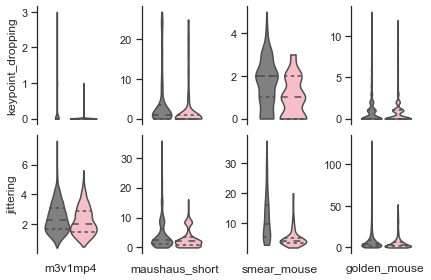

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dict_ = pd.read_hdf('../data/Figure3/video_adaptation_scores.h5').to_dict()
dfs = []

for k, v in dict_.items():
    if not ('keypoint_dropping' in k or 'jittering' in k):
        continue
    temp = []
    for k2, v2 in v.items():
        try:
            df_ = pd.DataFrame(v2, columns=['val'])
        except ValueError:
            df_ = pd.DataFrame(np.nanmean(v2, axis=(0, 2)), columns=['val'])
        df_['video'] = k2
        temp.append(df_)
    temp = pd.concat(temp)
    temp['cond'] = k[0]
    temp['metric'] = k[1]
    temp['niters'] = int(k[2])
    dfs.append(temp)

df = pd.concat(dfs)
df_ = df
videos = list(df_.video.unique())
niters = dict(zip(videos, [2000, 1000, 2000, 1000]))
metrics = list(df_.metric.unique())

fig, axes = plt.subplots(
    2, 4, sharex=True, sharey=False, tight_layout=True, figsize=(6, 4),
)

for i, video in enumerate(videos):
    for j, metric in enumerate(metrics):
        temp = df_[
            (df_['video'] == video) & (df_['metric'] == metric) & ((df_['niters'] == 200000) | (df_['niters'] == niters[video]))
        ]
        ax = axes[j, i]
        sns.violinplot(
            temp, x='metric', y='val',
            cut=0,
            palette=['grey', 'lightpink'],  # Change the palette here
            hue='cond', ax=ax,
            inner='quartiles',
            hue_order=['before_adapt', 'after_adapt']
        )
        ax.set_xticks([])
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.legend().set_visible(False)
        sns.despine(ax=ax, bottom=True)

for ax, metric in zip(axes[:, 0], metrics):
    ax.set_ylabel(metric)

for ax, video in zip(axes[1], videos):
    ax.set_xlabel(video)

fig.align_ylabels()
plt.savefig('violin_plot.png', dpi=300, bbox_inches='tight', transparent = True)
plt.show()

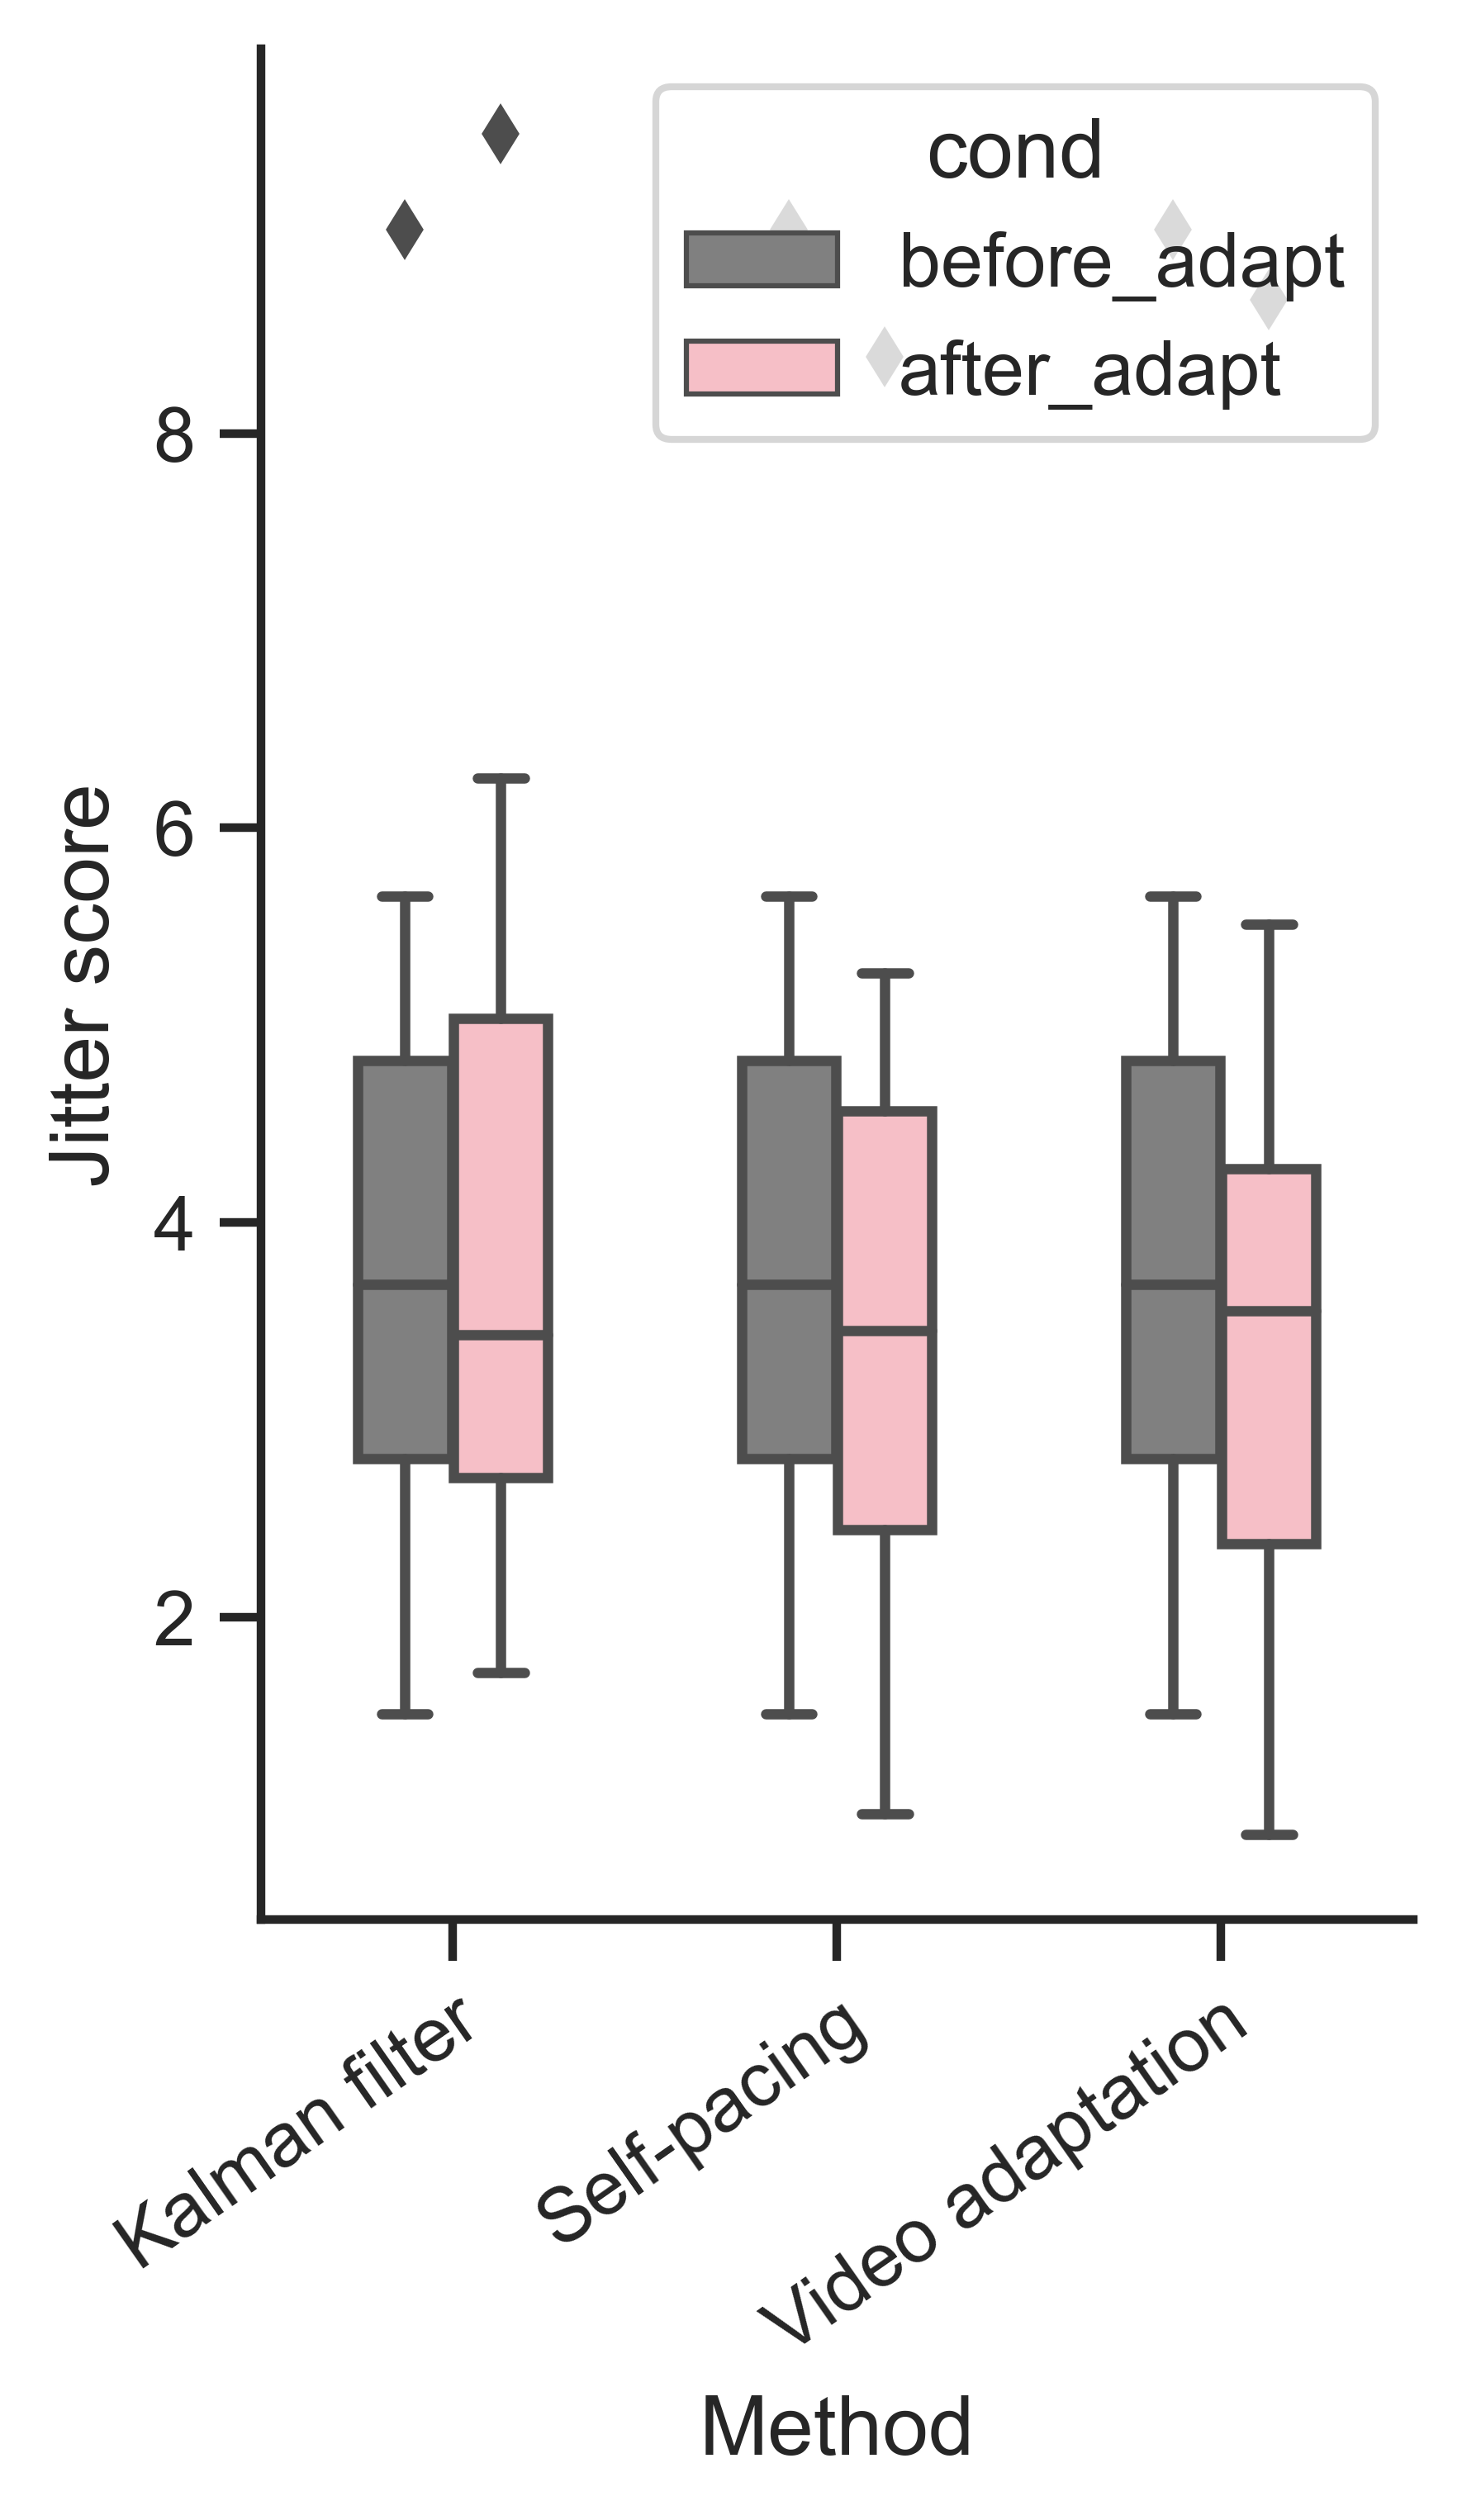

In [4]:
df = pd.read_hdf('../data/Extended_Figure4/horsejitter.h5').reset_index()

fig, ax = plt.subplots(figsize=(3, 5), dpi=600)
sns.boxplot(
    df, x='method', y='jitter',
    palette=['grey', 'lightpink'],  # Change the palette here
    hue='cond', ax=ax,
    width=0.5,
    hue_order=['before_adapt', 'after_adapt']
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha="right", rotation_mode='anchor')

ax.set_xlabel('Method')
ax.set_ylabel('Jitter score')
sns.despine(ax=ax)

In [5]:
df = pd.read_hdf('../data/Extended_Figure4/hrnet_w32_adaptation_results_quadruped80k.h5').reset_index()
df.columns = ['video', 'method', 'cond', 'mAP']
df = df[(df.method != 'self_pacing_fix_BN') & (df.method != 'video_adaptation_relax_BN')]
df['mAP'] *= 100
df['method'] = df['method'].map(
    {
        'kalman_filter': 'Kalman filter',
        'self_pacing_relax_BN': 'Self-pacing',
        'video_adaptation_fix_BN': 'Video adaptation',
    },
)

sns.set_theme(style="ticks")

fig, axes = plt.subplots(ncols=2, figsize=(5, 5), sharey=True, width_ratios=[1.5, 1])
df1 = df[(df.cond == 'adaptation_gain')]
df2 = df[(df.cond == 'robustness_gain')]
for i, df_ in enumerate([df1, df2]):
    sns.boxplot(
        df_, x="method", y="mAP", hue="method",
        whis=[0, 100], width=.5, palette="PuRd",
        showfliers=False, ax=axes[i],
    )
    sns.stripplot(df_, x="method", y="mAP", size=4, color=".3", ax=axes[i])

axes[0].set(ylabel="Difference in detection accuracy (mAP)")
axes[0].set_xlabel('Adaptation')
axes[1].set_xlabel('Robustness')
o = 10
sns.despine(trim=False, top=True, right=True, ax=axes[0], offset=o)
sns.despine(trim=False, top=True, right=True, ax=axes[1], offset=o)
for ax in axes:
    ax.yaxis.grid(True)
    ax.set_ylim(-40, 10)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha="right", rotation_mode='anchor')

AttributeError: 'Figure' object has no property 'width_ratios'

In [ ]:
import ipynb.fs
import pickle
from .defs.Figure4 import _make_line_collection

with open('../data/Extended_Figure4/links.pickle', 'rb') as f:
    links_front_limb_gt, links_hind_limb_gt, links_front_limb, links_hind_limb = pickle.load(f)

with open('../data/Extended_Figure4/coords.pickle', 'rb') as f:
    coords_gt, coords = pickle.load(f)

with open('../data/Extended_Figure4/stances.pickle', 'rb') as f:
    stances_gt, stances = pickle.load(f)

s, e = 60, 35
coll_gt, segs_gt = _make_line_collection(coords_gt, stances_gt[0], links_front_limb_gt, start=s, end=-e, color_stance='k')
coll_gt2, segs_gt2 = _make_line_collection(coords_gt, stances_gt[1], links_hind_limb_gt, start=s, end=-e, color_stance='k')
fig, axes = plt.subplots(nrows=2, sharex=True, sharey=True)
for ax in axes:
    sns.despine(ax=ax, left=True, bottom=True)
    ax.set_xticks([])
    ax.set_yticks([])
axes[0].set_aspect('equal')
xmin, ymin = np.nanmin(np.r_[segs_gt, segs_gt2], axis=(0, 1))
xmax, ymax = np.nanmax(np.r_[segs_gt, segs_gt2], axis=(0, 1))
axes[0].set_xlim(xmin, xmax + 10)
axes[0].set_ylim(ymin - 10, ymax + 10)
axes[0].invert_yaxis()
axes[0].add_collection(coll_gt)
axes[0].set_ylabel('Forelimb')
axes[1].add_collection(coll_gt2)
axes[1].set_ylabel('Hindlimb')

coll, segs = _make_line_collection(coords, stances[0], links_front_limb, start=s, end=-e, color_stance='k')
coll2, segs2 = _make_line_collection(coords, stances[1], links_hind_limb, start=s, end=-e, color_stance='k')
fig, axes = plt.subplots(nrows=2, sharex=True, sharey=True)
for ax in axes:
    sns.despine(ax=ax, left=True, bottom=True)
    ax.set_xticks([])
    ax.set_yticks([])
axes[0].set_aspect('equal')
axes[0].set_xlim(xmin, xmax + 10)
axes[0].set_ylim(ymin - 10, ymax + 10)
axes[0].invert_yaxis()
axes[0].add_collection(coll)
axes[0].set_ylabel('Forelimb')
axes[1].add_collection(coll2)
axes[1].set_ylabel('Hindlimb')